In [1]:
import torch

In [2]:
#1

ans1 = torch.rand(3, 4) + torch.rand(4, 3)
ans1

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [3]:
torch.randn(3, 4) + torch.randn(4, )

tensor([[ 1.0489,  2.0216, -0.9239,  1.3273],
        [ 1.6904,  1.6627, -0.2893,  1.3192],
        [ 1.2586,  1.9307,  1.1280,  0.8915]])

In [4]:
torch.randn(3, 4) + torch.randn(4, 1)

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 0

In [5]:
torch.tensor([1, 0], dtype=torch.float32) + torch.tensor([2, 1], dtype=torch.float64)

tensor([3., 1.], dtype=torch.float64)

In [6]:
t = torch.zeros(3, dtype=torch.uint8)
t[0] = -3.14
t[0]

RuntimeError: value cannot be converted to type uint8_t without overflow

In [13]:
torch.tensor(3, device="cpu") + torch.tensor(4, device="cuda")


tensor(7, device='cuda:0')

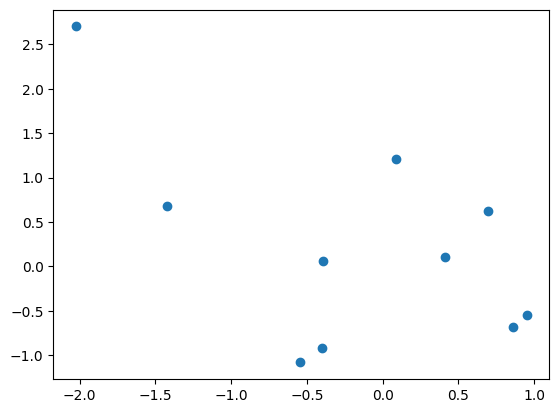

In [20]:
x = torch.randn(10)
y = torch.randn(10)

import matplotlib.pyplot as plt

plt.scatter(x, y)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

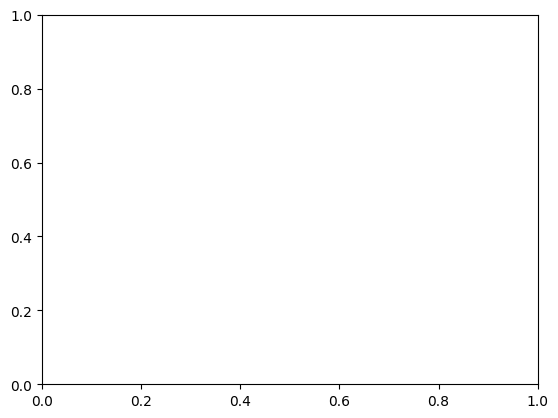

In [21]:
x = torch.randn(10, device="cuda")
y = torch.randn(10, device="cuda")

import matplotlib.pyplot as plt

plt.scatter(x, y)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

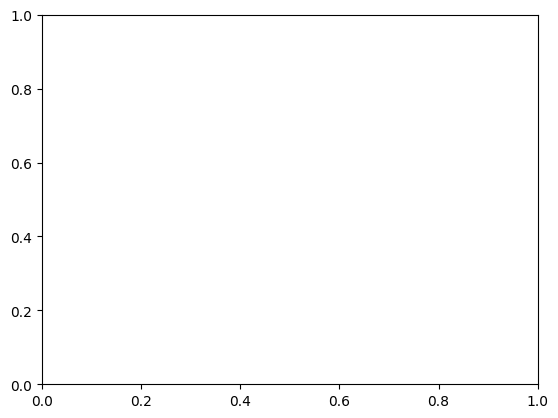

In [22]:
x = torch.randn(10, requires_grad=True)
y = torch.randn(10, requires_grad=True)


import matplotlib.pyplot as plt

plt.scatter(x, y)

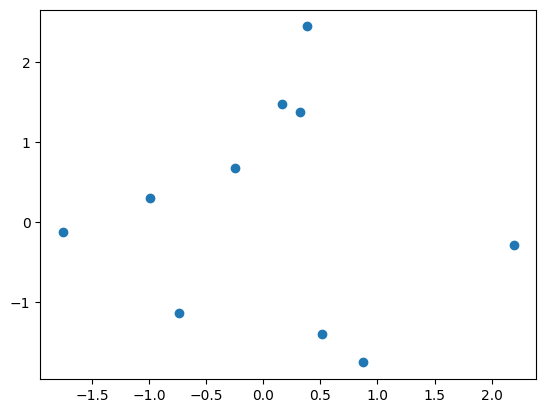

In [24]:
x = torch.randn(10, requires_grad=True)
y = torch.randn(10, requires_grad=True)


import matplotlib.pyplot as plt

plt.scatter(x.detach(), y.detach())

In [33]:
t = torch.tensor([2, 1])
t += 1
t

tensor([3, 2])

In [35]:
t = torch.tensor([2, 1], requires_grad=True, dtype=torch.float32)
t += 1
t

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [40]:
x = torch.tensor(100.0, requires_grad=True)

y = x**2

dy_dx = torch.autograd.grad(y, x)[0]

# Print the result
print(f"The derivative of y = x^2 at x = 100 is: {dy_dx.item()}")


The derivative of y = x^2 at x = 100 is: 200.0


In [41]:
x = torch.tensor([100.0, 100.0], requires_grad=True)

y = x**2

dy_dx = torch.autograd.grad(y, x)[0]

# Print the result
print(f"The derivative of y = x^2 at x = 100 is: {dy_dx.item()}")


RuntimeError: grad can be implicitly created only for scalar outputs

In [42]:
x = torch.tensor(100.0, requires_grad=True)

y = torch.log(torch.exp(x))

dy_dx = torch.autograd.grad(y, x)[0]

# Print the result
print(f"The derivative of y = x^2 at x = 100 is: {dy_dx.item()}")


The derivative of y = x^2 at x = 100 is: nan


In [53]:
big = torch.tensor((5000, 1000, 1000, 5000), dtype=torch.float64, device='cuda')


TypeError: Invalid shape (3, 32, 32) for image data

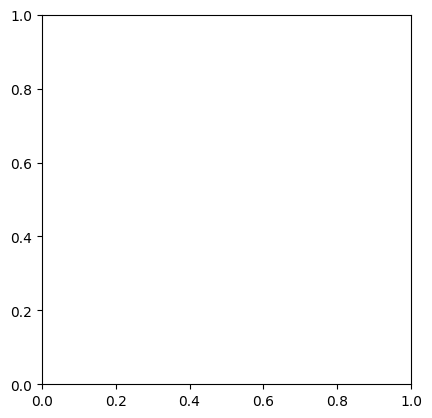

In [60]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
dataset = torchvision.datasets.CIFAR10(
    root='path_to_your_dataset',  # Replace with the actual directory
    train=True,
    transform=transform,
    download=True
)

# Load a single image from the dataset
img, label = dataset[0]

plt.imshow(img)

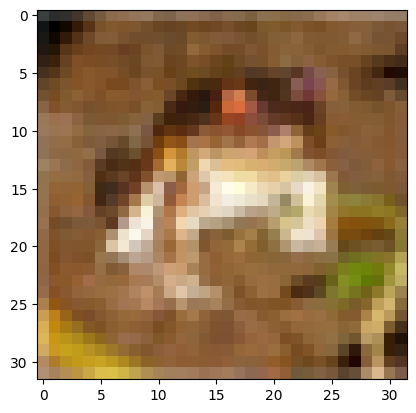

In [61]:
plt.imshow(img.permute(1, 2, 0))